Our Objective is to predict GDP of the country

The data definition is as follows:
Country,Population of the country,Area_sqm,Population_Density_Per_sqm,Coastline (coast/area ratio), Country,Population,Area_sqm,Pop_Density_per sqm,,Net migration,Infant mortality (per 1000 births),
GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,
Industry,Service.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/GDP_Country1.csv')
data.head()

,Country,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
# Step - 1---> Preprocessing:

In [4]:
dd = data.set_index('Country')
dd.head()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
# Null value Imputation:

In [6]:
dd.isnull().sum()

Population                             0
Area_sqm                               0
Pop_Density_per sqm                    0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [7]:
from sklearn.impute import KNNImputer

In [8]:
impu = KNNImputer()

dt = impu.fit_transform(dd)

dt = pd.DataFrame(dt,columns = dd.columns, index = dd.index)
dt.head()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.2400,0.3800
Albania,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.1880,0.5790
Algeria,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.6000,0.2980
American Samoa,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1194,0.2110,0.6698
Andorra,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0518,0.2222,0.7262


In [9]:
dt.isnull().sum()

Population                            0
Area_sqm                              0
Pop_Density_per sqm                   0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

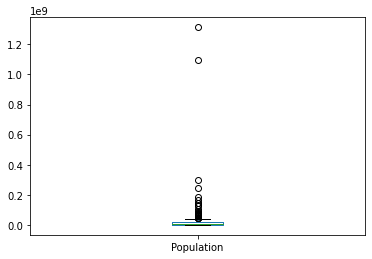

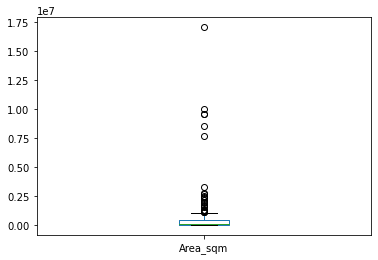

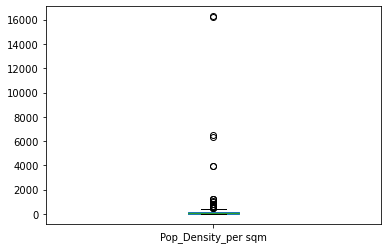

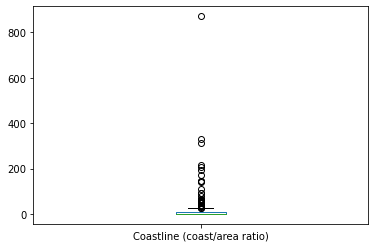

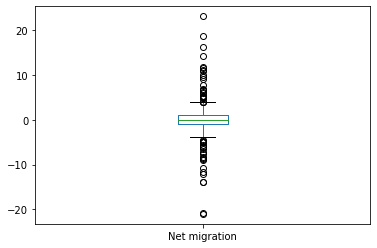

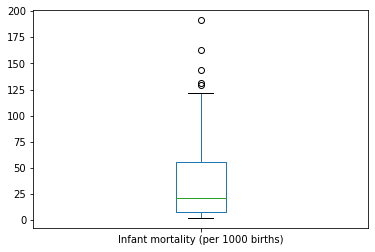

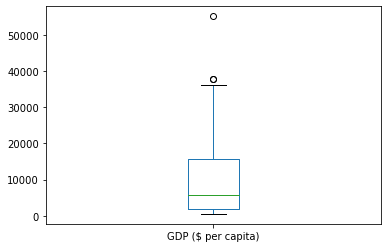

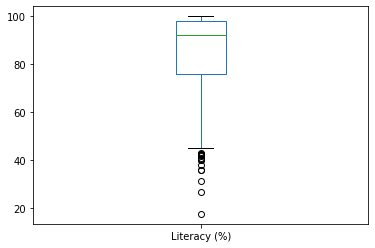

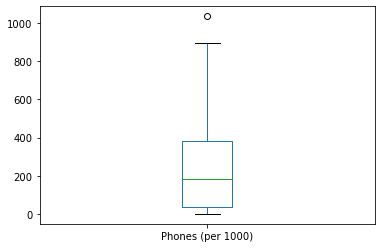

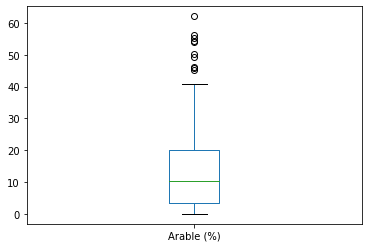

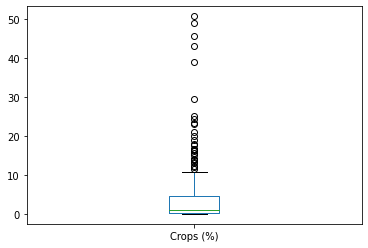

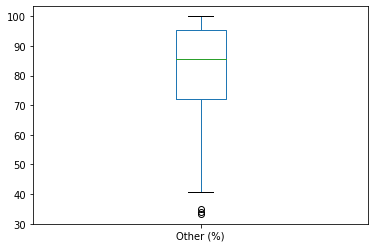

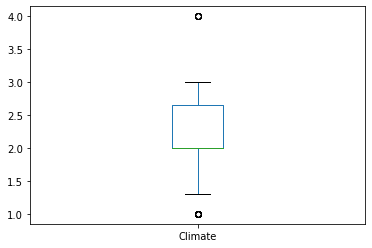

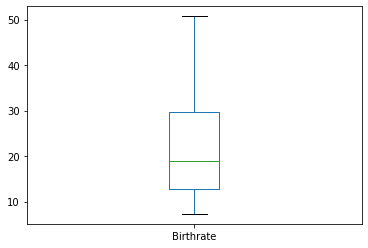

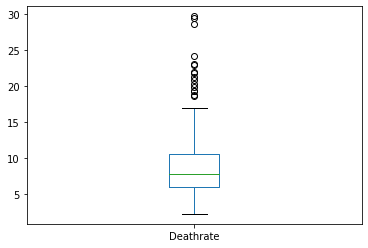

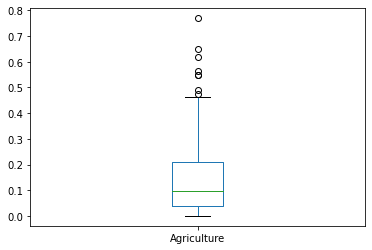

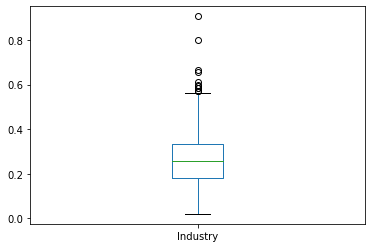

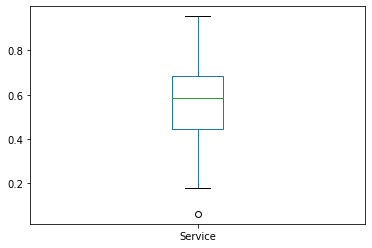

In [10]:
# To check Outlier:

for i in dt.columns:
    dt[i].plot(kind = 'box')
    plt.show()

In [11]:
# Outlier Treatment:

# by capping:

for i in dt.columns:
    q1=dt[i].quantile(0.25)
    q3=dt[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=dt[i].quantile(0.99)
    lc=dt[i].quantile(0.01)
    for ind1 in dt[i].index:
        if dt.loc[ind1, i] >ub:            
            dt.loc[ind1, i] =uc
        if dt.loc[ind1, i] < lb:
            dt.loc[ind1, i] =lc

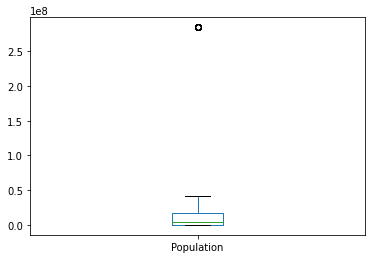

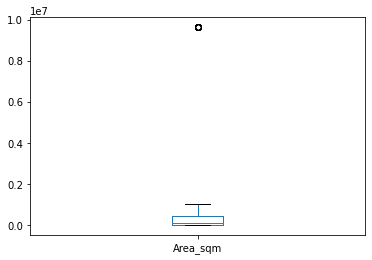

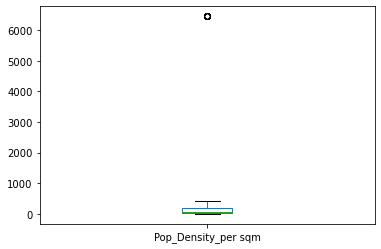

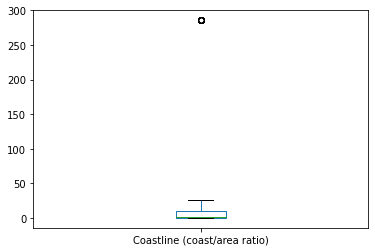

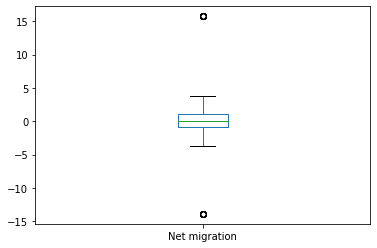

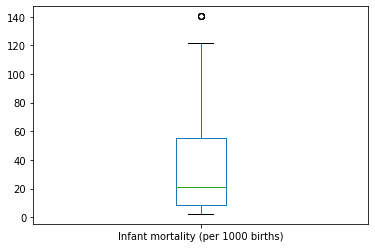

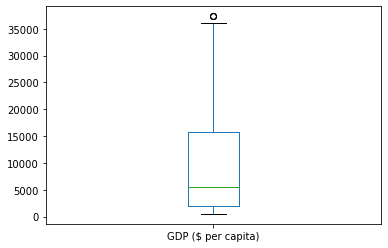

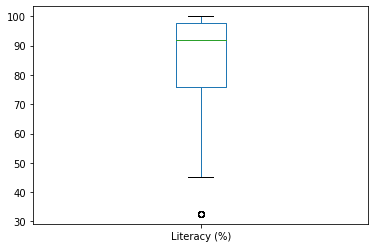

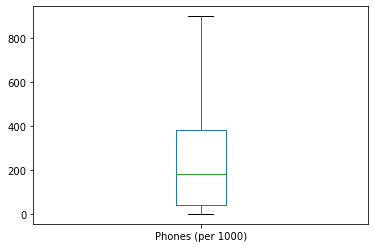

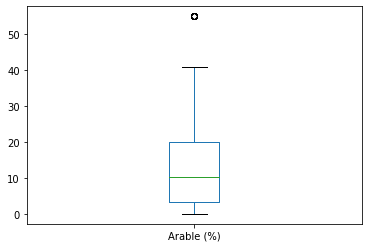

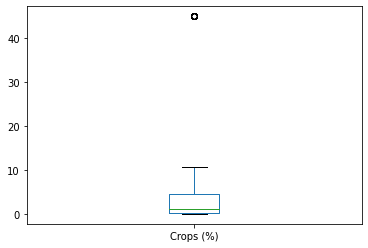

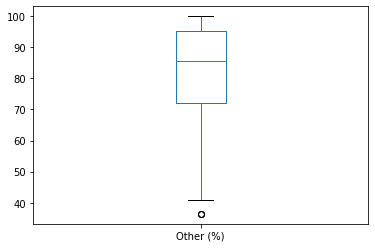

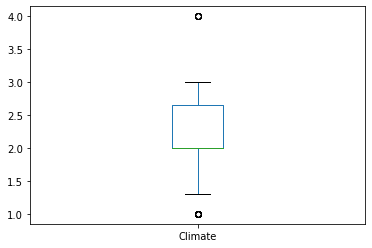

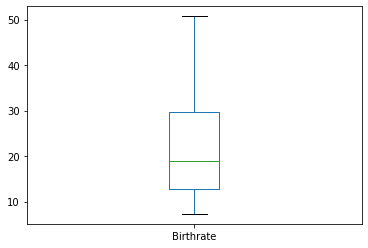

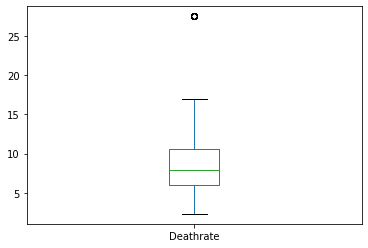

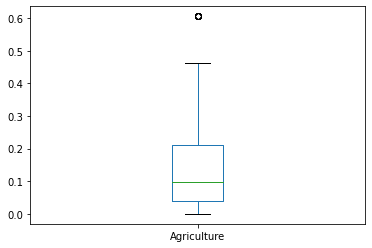

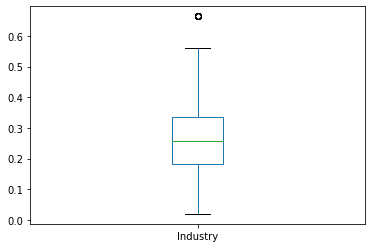

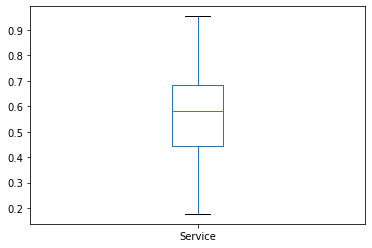

In [12]:
# To recheck the outlier treatment:

for i in dt.columns:
    dt[i].plot(kind = 'box')
    plt.show()

In [13]:
# Step - 2 -----> To check whether the overall model is significant or not?

inp = dt.drop('GDP ($ per capita)',axis = 1)
out = dt['GDP ($ per capita)']

inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.40e-63
Time:                        23:11:50   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               8642.6765   1.21e+04      0.715      0.475   -1.52e+04    3.25e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     6.21e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Inference: From the above model summary of Probability of fstat(p < 0.05), we can conclude that overall model is significant.

# From r-square value we can infere that, model ability to explain target variation with respect to input is 80%.
# Bias error can be calculated as 1 - 0.801 is approximatley equal to 0.2. i.e 20%.

In [15]:
# Step - 3 ----> To proceed with linear regression model, 5 assumptions need to be checked.

# 1. Multicollinearity
# 2. Normality
# 3. Linearity
# 4. Auto-correlation
# 5. Homoscadacity

In [16]:
# 1. To check multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
inp1 = inp - inp.mean()

In [18]:
inp1c = sm.add_constant(inp1)

ols = sm.OLS(out,inp1c)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.40e-63
Time:                        23:11:50   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9620.3348    299.480     32.123      0.000    9029.946    1.02e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     4.75e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# To check variance-inflation-factor:

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp1c.values,i) for i in range(inp1c.shape[1])]
vif['Features'] = inp1c.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
17,25.532397,Service
15,20.026042,Agriculture
16,16.545912,Industry
11,14.145739,Other (%)
9,10.506242,Arable (%)
6,9.500994,Infant mortality (per 1000 births)
13,6.134302,Birthrate
10,3.830876,Crops (%)
8,3.238427,Phones (per 1000)
7,2.764233,Literacy (%)


In [20]:
# Inference: From the above dataframe we can infer that "service" has high VIF value(which is greter than 5). so we can drop and recheck for VIF

In [21]:
inp_v1 = inp1.drop('Service',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v1.values,i) for i in range(inp_v1.shape[1])]
vif['Features'] = inp_v1.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
10,14.141041,Other (%)
8,10.504615,Arable (%)
5,9.466748,Infant mortality (per 1000 births)
12,6.134036,Birthrate
9,3.830859,Crops (%)
14,3.252902,Agriculture
7,3.212241,Phones (per 1000)
6,2.740219,Literacy (%)
13,2.508962,Deathrate
3,1.780749,Coastline (coast/area ratio)


In [22]:
# Inference: From the above dataframe, we can infer that "Others"  having high VIF value which is > 5. so we can drop and recheck for VIF

In [23]:
inp_v2 = inp_v1.drop('Other (%)',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v2.values,i) for i in range(inp_v2.shape[1])]
vif['Features'] = inp_v2.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
5,9.437339,Infant mortality (per 1000 births)
11,6.065702,Birthrate
13,3.252899,Agriculture
7,3.201979,Phones (per 1000)
6,2.718619,Literacy (%)
12,2.508164,Deathrate
3,1.744867,Coastline (coast/area ratio)
14,1.713809,Industry
10,1.588994,Climate
8,1.413931,Arable (%)


In [24]:
# Inference: From the above dataframe, we can infer that "Infant mortality (per 1000 births)" having high VIF value > 5.
# so we can drop and recheck for VIF.

In [25]:
inp_v3 = inp_v2.drop('Infant mortality (per 1000 births)',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_v3.values,i) for i in range(inp_v3.shape[1])]
vif['Features'] = inp_v3.columns
vif.sort_values('VIF', ascending = False)

,VIF,Features
10,4.484879,Birthrate
6,3.132257,Phones (per 1000)
12,2.771160,Agriculture
5,2.582218,Literacy (%)
3,1.738336,Coastline (coast/area ratio)
13,1.665256,Industry
9,1.580450,Climate
11,1.463293,Deathrate
7,1.413394,Arable (%)
1,1.397710,Area_sqm


In [26]:
# From the above dataframe we can infer that all the values are < 5. so we can build model to check the significance nature.

In [27]:
inpc = sm.add_constant(inp_v3)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     60.12
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           9.60e-66
Time:                        23:11:52   Log-Likelihood:                -2224.0
No. Observations:                 227   AIC:                             4478.
Df Residuals:                     212   BIC:                             4529.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    298.964     32.179      0.000    9031.013    1.02e+04
Population                    1.405e-06   3.84e-06      0.366      0.714   -6.16e-06    8.97e-06
Area_sqm                     -2.966e-05      0.000     -0.262      0.794      -0.000       0.000
Pop_Density_per sqm              0.0106      0.187      0.057      0.955      -0.357       0.379
Coastline (coast/area ratio)   -15.2505      3.771     -4.045      0.000     -22.683      -7.818
Net migration                  294.0734     45.252      6.499      0.000     204.871     383.276
Literacy (%)                     8.7987     24.219      0.363      0.717     -38.943      56.540
Phones (per 1000)               32.6500      2.370     13.778      0.000      27.979      37.321
Arable (%)                     -41.8676     26.638     -1.572      0.118     -94.378      10.643
Crops (%)                       -1.3818     23.463     -0.059      0.953     -47.632      44.869
Climate                       -128.6667    555.418     -0.232      0.817   -1223.515     966.182
Birthrate                      -75.7142     57.134     -1.325      0.187    -188.337      36.909
Deathrate                       50.4181     61.482      0.820      0.413     -70.776     171.612
Agriculture                  -5516.0947   3461.857     -1.593      0.113   -1.23e+04    1307.978
Industry                      2457.0810   2833.698      0.867      0.387   -3128.753    8042.915
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.039
Skew:                           0.225   Prob(JB):                     0.000542
Kurtosis:                       4.178   Cond. No.                     1.20e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# 2. Normality:

ols_mod.resid.skew()

0.2268358811342177

<AxesSubplot:ylabel='Density'>

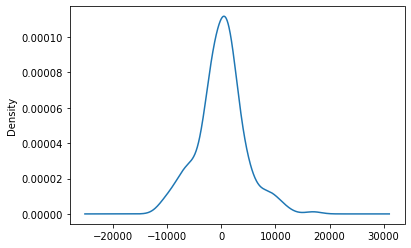

In [29]:
ols_mod.resid.plot(kind = 'density')

In [30]:
# Inference: Above skew value is 0.2, which is in the acceptable range of -0.5 to 0.5. 

# from the above density plot we can conclude that, data is noramlly distributed.

In [31]:
# 3. Linearity:
from statsmodels.stats.diagnostic import linear_rainbow

In [32]:
linear_rainbow(res = ols_mod, frac = 0.5)

(0.8285773037282238, 0.8338424695118349)

In [33]:
# from the above value we can infer that, Pvalue > 0.05. Null hypothesis is accepted, part of data is accepted. 

# Model is statisfying the linearity condition. 

In [34]:
# 4. Autocorrelation:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     60.12
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           9.60e-66
Time:                        23:11:53   Log-Likelihood:                -2224.0
No. Observations:                 227   AIC:                             4478.
Df Residuals:                     212   BIC:                             4529.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    298.964     32.179      0.000    9031.013    1.02e+04
Population                    1.405e-06   3.84e-06      0.366      0.714   -6.16e-06    8.97e-06
Area_sqm                     -2.966e-05      0.000     -0.262      0.794      -0.000       0.000
Pop_Density_per sqm              0.0106      0.187      0.057      0.955      -0.357       0.379
Coastline (coast/area ratio)   -15.2505      3.771     -4.045      0.000     -22.683      -7.818
Net migration                  294.0734     45.252      6.499      0.000     204.871     383.276
Literacy (%)                     8.7987     24.219      0.363      0.717     -38.943      56.540
Phones (per 1000)               32.6500      2.370     13.778      0.000      27.979      37.321
Arable (%)                     -41.8676     26.638     -1.572      0.118     -94.378      10.643
Crops (%)                       -1.3818     23.463     -0.059      0.953     -47.632      44.869
Climate                       -128.6667    555.418     -0.232      0.817   -1223.515     966.182
Birthrate                      -75.7142     57.134     -1.325      0.187    -188.337      36.909
Deathrate                       50.4181     61.482      0.820      0.413     -70.776     171.612
Agriculture                  -5516.0947   3461.857     -1.593      0.113   -1.23e+04    1307.978
Industry                      2457.0810   2833.698      0.867      0.387   -3128.753    8042.915
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.039
Skew:                           0.225   Prob(JB):                     0.000542
Kurtosis:                       4.178   Cond. No.                     1.20e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# from the above constructed ols model as per Durbin-Watson test value is approximately 2.0. Therefore no auto correlation. 

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

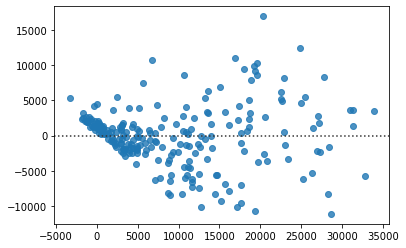

In [36]:
# 5. Homoscadacity:
inpc = sm.add_constant(inp_v3)

ypred = ols_mod.predict(inpc)

sns.residplot(ypred,ols_mod.resid)

In [37]:
from statsmodels.stats.api import het_goldfeldquandt

In [38]:
# H0 : Model is Homoscadasity:

het_goldfeldquandt(ols_mod.resid,inp_v3)

(0.7124269225010613, 0.953721975546474, 'increasing')

In [39]:
# p > 0.05. Therefore Null hypothesis hold good. Model is said to be Homoscadasity.

In [40]:
# Step - 4 ----> Feature Selection:

# 1. Forward Selection
# 2. Backward Elimination
# 3. Recursive Feature Elimination

In [41]:
pip install mlxtend

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [43]:
# 1.Forward Selection:
lr = LinearRegression()

lr_forward = sfs(estimator = lr, k_features = 'best', forward = True, scoring = 'r2')

sfs_forward = lr_forward.fit(inp_v3,out)

feat_forward = (sfs_forward.k_feature_names_)
feat_forward = list(feat_forward)

print(feat_forward)
print(sfs_forward.k_score_)

['Coastline (coast/area ratio)', 'Net migration', 'Phones (per 1000)', 'Arable (%)', 'Birthrate', 'Agriculture']
0.7737304006688334


In [44]:
# 2.Backward Elimination:
lr = LinearRegression()

lr_backward = sfs(estimator = lr, k_features = 'best', forward = False, scoring = 'r2')

sfs_backward = lr_backward.fit(inp_v3,out)

feat_backward = (sfs_backward.k_feature_names_)
feat_backward = list(feat_backward)

print(feat_backward)
print(sfs_backward.k_score_)

['Coastline (coast/area ratio)', 'Net migration', 'Phones (per 1000)', 'Arable (%)', 'Birthrate', 'Agriculture']
0.7737304006688334


In [45]:
# 3 . RFE method
from sklearn.feature_selection import RFECV

In [46]:
lr = LinearRegression()

rfecv = RFECV(estimator = lr)
rfe_mod = rfecv.fit(inp_v3,out)
rfe_mod.ranking_

array([4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
rank = pd.DataFrame()

rank['Feature'] = inp_v3.columns
rank['Rank'] = rfe_mod.ranking_

feat_rfe = rank[rank['Rank']==1]['Feature']
feat_rfe = list(feat_rfe)
feat_rfe

['Coastline (coast/area ratio)',
 'Net migration',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry']

In [48]:
# Report card generation to identify the overfitting nature of the model:

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [50]:
# from Forward Selection:
xtrain,xtest,ytrain,ytest = train_test_split(inp_v3,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_forward],ytrain)

ypred_train = lr.predict(xtrain[feat_forward])
ypred_test = lr.predict(xtest[feat_forward])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_forward = [r2_train,r2_test,rmse_train,rmse_test]
rse_forward

[0.8196848766865689, 0.7299788132450862, 4075.142664519252, 5166.213930821863]

In [51]:
# from Backward Elimination
xtrain,xtest,ytrain,ytest = train_test_split(inp_v3,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_backward],ytrain)

ypred_train = lr.predict(xtrain[feat_backward])
ypred_test = lr.predict(xtest[feat_backward])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_backward = [r2_train,r2_test,rmse_train,rmse_test]
rse_backward

[0.8196848766865689, 0.7299788132450862, 4075.142664519252, 5166.213930821863]

In [52]:
# from RFE
xtrain,xtest,ytrain,ytest = train_test_split(inp_v3,out,test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(xtrain[feat_rfe],ytrain)

ypred_train = lr.predict(xtrain[feat_rfe])
ypred_test = lr.predict(xtest[feat_rfe])

r2_train = r2_score(ytrain,ypred_train)
r2_test = r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

rse_rfe = [r2_train,r2_test,rmse_train,rmse_test]
rse_rfe

[0.8260138124141034,
 0.7099609066013849,
 4002.9865111267204,
 5354.2880887941365]

In [53]:
scorecard = pd.DataFrame()
scorecard['Forward'] = rse_forward
scorecard['Backward'] = rse_backward
scorecard['RFE'] = rse_rfe
scorecard.index = ['r2_train','r2_test','rmse_train','rmse_test']
scorecard

,Forward,Backward,RFE
r2_train,0.819685,0.819685,0.826014
r2_test,0.729979,0.729979,0.709961
rmse_train,4075.142665,4075.142665,4002.986511
rmse_test,5166.213931,5166.213931,5354.288089


In [54]:
# inference: Difference between r2_train and r2_test is more for RFE by comparing with other two forward and backward. 
#            RFE facing overfitting problem.

In [55]:
# To analyse Overfitting nature:

# Cross-Validation:
from sklearn.model_selection import cross_val_score

In [56]:
lr = LinearRegression()

score = cross_val_score(lr, inp_v3, out, cv = 5, scoring = 'r2')

avg_score = np.mean(score)
var_error = np.std(score)
coeff_error = np.std(score) / np.mean(score)

print(avg_score,var_error,coeff_error)

0.7535360846057299 0.11345166875800265 0.1505590390105387


In [57]:
# inference: Above coeff_error value is nearly 15%, with r-square value of 75 and low bias error.
# so we can conclude that model facing overfitting problem.

In [58]:
# To overcome the overfitting problem Regularization can be done.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [60]:
# GridsearchCV using Ridge:

para = {'alpha' : [0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.7,1,2,5,10,20,30,50,100]}

rid = Ridge(normalize = True)
grid = GridSearchCV(rid, param_grid = para, scoring = 'r2', cv =5)

mod_grid = grid.fit(xtrain,ytrain)

In [61]:
# To find best parameter:
mod_grid.best_params_

{'alpha': 0.01}

In [62]:
# To find best score:
mod_grid.best_score_

0.7885210893406306

In [63]:
# To get result: based on mean_test_score
pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005402,0.003201,0.003612,0.002574,1e-05,{'alpha': 1e-05},0.886358,0.781063,0.674551,0.729748,0.867639,0.787872,0.080410,4
1,0.006252,0.007657,0.003125,0.006251,0.0001,{'alpha': 0.0001},0.886337,0.781047,0.674585,0.729804,0.867630,0.787881,0.080385,3
2,0.006250,0.007655,0.003125,0.006250,0.001,{'alpha': 0.001},0.886125,0.780879,0.674919,0.730353,0.867541,0.787964,0.080145,2
3,0.006250,0.007655,0.003125,0.006250,0.01,{'alpha': 0.01},0.883916,0.779030,0.678050,0.735143,0.866467,0.788521,0.077870,1
4,0.006251,0.007656,0.003125,0.006250,0.1,{'alpha': 0.1},0.858251,0.754904,0.696424,0.746920,0.848470,0.780994,0.062475,5
5,0.006250,0.007655,0.003125,0.006251,0.2,{'alpha': 0.2},0.829971,0.729257,0.704165,0.736336,0.826834,0.765313,0.052620,6
6,0.006250,0.007655,0.003125,0.006250,0.5,{'alpha': 0.5},0.759980,0.669854,0.703137,0.694940,0.773704,0.720323,0.039772,7
7,0.006250,0.007654,0.003126,0.006252,0.7,{'alpha': 0.7},0.722506,0.638811,0.694753,0.671426,0.745450,0.694589,0.037454,8
8,0.006250,0.007655,0.003125,0.006251,1,{'alpha': 1},0.674971,0.599298,0.677847,0.641134,0.708998,0.660450,0.037371,9
9,0.006250,0.007655,0.003125,0.006251,2,{'alpha': 2},0.559208,0.500658,0.612526,0.561813,0.612758,0.569393,0.041537,10


In [64]:
# To get the result based on std_test_score:
pd.DataFrame(mod_grid.cv_results_).sort_values('std_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.006250,0.007655,0.003125,0.006250,100,{'alpha': 100},0.016000,-0.027927,0.045072,0.010372,-0.027701,0.003163,0.027901,16
14,0.006251,0.007655,0.003125,0.006250,50,{'alpha': 50},0.048726,0.006869,0.086337,0.051005,0.017753,0.042138,0.027979,15
13,0.003125,0.006251,0.006250,0.007655,30,{'alpha': 30},0.088359,0.048565,0.135528,0.099206,0.071946,0.088721,0.028965,14
12,0.003125,0.006251,0.003126,0.006252,20,{'alpha': 20},0.132422,0.094324,0.189109,0.151415,0.131007,0.139655,0.030874,13
11,0.007827,0.005651,0.004001,0.000002,10,{'alpha': 10},0.237252,0.200508,0.311105,0.269175,0.265796,0.256767,0.036699,12
8,0.006250,0.007655,0.003125,0.006251,1,{'alpha': 1},0.674971,0.599298,0.677847,0.641134,0.708998,0.660450,0.037371,9
7,0.006250,0.007654,0.003126,0.006252,0.7,{'alpha': 0.7},0.722506,0.638811,0.694753,0.671426,0.745450,0.694589,0.037454,8
6,0.006250,0.007655,0.003125,0.006250,0.5,{'alpha': 0.5},0.759980,0.669854,0.703137,0.694940,0.773704,0.720323,0.039772,7
9,0.006250,0.007655,0.003125,0.006251,2,{'alpha': 2},0.559208,0.500658,0.612526,0.561813,0.612758,0.569393,0.041537,10
10,0.003125,0.006250,0.006250,0.007655,5,{'alpha': 5},0.372922,0.331894,0.454424,0.406134,0.425857,0.398246,0.042484,11


In [66]:
# GridSearchCV using LASSO:

para = {'alpha' : [0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.7,1,2,5,10,20,30,50,100]}

las = Lasso(normalize = True)
grid = GridSearchCV(las, param_grid = para, scoring = 'r2', cv =5)

mod_grid = grid.fit(xtrain,ytrain)

In [67]:
# To find best Parameter:
mod_grid.best_params_

{'alpha': 10}

In [68]:
# To find best socre:
mod_grid.best_score_

0.7939706672968705

In [69]:
# To get reuslt:

pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012512,0.006256,0.009364,0.007646,1e-05,{'alpha': 1e-05},0.886360,0.781065,0.674548,0.729742,0.867640,0.787871,0.080412,14
1,0.015626,0.009887,0.006248,0.007652,0.0001,{'alpha': 0.0001},0.886360,0.781065,0.674548,0.729742,0.867640,0.787871,0.080412,13
2,0.019576,0.007262,0.005723,0.005744,0.001,{'alpha': 0.001},0.886361,0.781066,0.674550,0.729743,0.867642,0.787872,0.080412,12
3,0.021750,0.007761,0.003950,0.006052,0.01,{'alpha': 0.01},0.886365,0.781072,0.674567,0.729755,0.867655,0.787883,0.080409,11
4,0.015626,0.009888,0.012500,0.011692,0.1,{'alpha': 0.1},0.886409,0.781136,0.674737,0.729877,0.867794,0.787991,0.080381,10
5,0.015626,0.009886,0.012501,0.011693,0.2,{'alpha': 0.2},0.886457,0.781206,0.674917,0.730012,0.867946,0.788108,0.080351,9
6,0.015735,0.010192,0.009236,0.005704,0.5,{'alpha': 0.5},0.886600,0.781410,0.675260,0.730401,0.868183,0.788371,0.080277,8
7,0.012495,0.006247,0.006251,0.007656,0.7,{'alpha': 0.7},0.886695,0.781541,0.675494,0.730657,0.868337,0.788545,0.080226,6
8,0.009376,0.007655,0.006251,0.007655,1,{'alpha': 1},0.886832,0.781730,0.675834,0.731020,0.868562,0.788796,0.080153,5
9,0.019382,0.009429,0.001810,0.003121,2,{'alpha': 2},0.887333,0.782304,0.676935,0.732318,0.869343,0.789647,0.079923,4


In [70]:
# To get best Standard test score:

pd.DataFrame(mod_grid.cv_results_).sort_values('std_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.006251,0.007656,0.003125,0.006250,5,{'alpha': 5},0.888836,0.784938,0.679859,0.735970,0.871621,0.792245,0.079349,3
11,0.006251,0.007656,0.000000,0.000000,10,{'alpha': 10},0.890855,0.788185,0.683500,0.732589,0.874723,0.793971,0.079890,1
9,0.019382,0.009429,0.001810,0.003121,2,{'alpha': 2},0.887333,0.782304,0.676935,0.732318,0.869343,0.789647,0.079923,4
8,0.009376,0.007655,0.006251,0.007655,1,{'alpha': 1},0.886832,0.781730,0.675834,0.731020,0.868562,0.788796,0.080153,5
7,0.012495,0.006247,0.006251,0.007656,0.7,{'alpha': 0.7},0.886695,0.781541,0.675494,0.730657,0.868337,0.788545,0.080226,6
6,0.015735,0.010192,0.009236,0.005704,0.5,{'alpha': 0.5},0.886600,0.781410,0.675260,0.730401,0.868183,0.788371,0.080277,8
5,0.015626,0.009886,0.012501,0.011693,0.2,{'alpha': 0.2},0.886457,0.781206,0.674917,0.730012,0.867946,0.788108,0.080351,9
4,0.015626,0.009888,0.012500,0.011692,0.1,{'alpha': 0.1},0.886409,0.781136,0.674737,0.729877,0.867794,0.787991,0.080381,10
3,0.021750,0.007761,0.003950,0.006052,0.01,{'alpha': 0.01},0.886365,0.781072,0.674567,0.729755,0.867655,0.787883,0.080409,11
2,0.019576,0.007262,0.005723,0.005744,0.001,{'alpha': 0.001},0.886361,0.781066,0.674550,0.729743,0.867642,0.787872,0.080412,12


In [72]:
# GridSearchCV using Elasticnet

para = {'alpha' : [0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,0.7,1,2,5,10,20,30,50,100],
        'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

ela = ElasticNet(normalize = True)
grid = GridSearchCV(ela, param_grid = para, scoring = 'r2', cv =5)

mod_grid = grid.fit(xtrain,ytrain)

In [73]:
# To find best parameter:
mod_grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.9}

In [74]:
# To find best score:
mod_grid.best_score_

0.7886067388140636

In [75]:
# To get result:
pd.DataFrame(mod_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009375,0.007655,0.003126,0.006252,1e-05,0.1,"{'alpha': 1e-05, 'l1_ratio': 0.1}",0.886093,0.780854,0.674969,0.730439,0.867527,0.787976,0.080109,13
1,0.003125,0.006250,0.006250,0.007654,1e-05,0.2,"{'alpha': 1e-05, 'l1_ratio': 0.2}",0.886123,0.780878,0.674922,0.730363,0.867540,0.787965,0.080142,14
2,0.007327,0.007496,0.001601,0.001960,1e-05,0.3,"{'alpha': 1e-05, 'l1_ratio': 0.3}",0.886153,0.780901,0.674876,0.730286,0.867553,0.787954,0.080176,15
3,0.003612,0.002243,0.001999,0.001673,1e-05,0.4,"{'alpha': 1e-05, 'l1_ratio': 0.4}",0.886182,0.780925,0.674829,0.730209,0.867565,0.787942,0.080210,16
4,0.009376,0.007656,0.000000,0.000000,1e-05,0.5,"{'alpha': 1e-05, 'l1_ratio': 0.5}",0.886212,0.780948,0.674782,0.730132,0.867578,0.787931,0.080243,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.003125,0.006250,0.006251,0.007656,100,0.5,"{'alpha': 100, 'l1_ratio': 0.5}",-0.019163,-0.065663,0.000133,-0.034083,-0.077205,-0.039196,0.028703,140
140,0.003125,0.006250,0.003125,0.006251,100,0.6,"{'alpha': 100, 'l1_ratio': 0.6}",-0.019050,-0.065534,0.000279,-0.033937,-0.077044,-0.039057,0.028698,139
141,0.003125,0.006250,0.003125,0.006251,100,0.7,"{'alpha': 100, 'l1_ratio': 0.7}",-0.018860,-0.065320,0.000523,-0.033693,-0.076775,-0.038825,0.028689,135
142,0.009375,0.007655,0.000000,0.000000,100,0.8,"{'alpha': 100, 'l1_ratio': 0.8}",-0.018482,-0.064894,0.001010,-0.033206,-0.076239,-0.038362,0.028672,130


In [76]:
# To get best standard test score:

pd.DataFrame(mod_grid.cv_results_).sort_values('std_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
98,0.013910,0.010460,0.006252,0.007657,5,0.9,"{'alpha': 5, 'l1_ratio': 0.9}",0.034991,-0.007594,0.069018,0.033510,-0.001790,0.025627,0.027885,78
87,0.006250,0.007655,0.006250,0.007655,2,0.7,"{'alpha': 2, 'l1_ratio': 0.7}",0.026719,-0.016468,0.058631,0.023323,-0.013221,0.015797,0.027906,81
75,0.006250,0.007655,0.000000,0.000000,1,0.4,"{'alpha': 1, 'l1_ratio': 0.4}",0.026826,-0.016374,0.058778,0.023460,-0.013078,0.015923,0.027915,80
64,0.000000,0.000000,0.009376,0.007656,0.7,0.2,"{'alpha': 0.7, 'l1_ratio': 0.2}",0.029977,-0.013023,0.062762,0.027357,-0.008724,0.019670,0.027919,79
63,0.003125,0.006251,0.003125,0.006250,0.7,0.1,"{'alpha': 0.7, 'l1_ratio': 0.1}",0.024764,-0.018577,0.056175,0.020910,-0.015931,0.013468,0.027921,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.009376,0.007656,0.000000,0.000000,1e-05,0.5,"{'alpha': 1e-05, 'l1_ratio': 0.5}",0.886212,0.780948,0.674782,0.730132,0.867578,0.787931,0.080243,17
5,0.003125,0.006250,0.003125,0.006250,1e-05,0.6,"{'alpha': 1e-05, 'l1_ratio': 0.6}",0.886242,0.780972,0.674736,0.730055,0.867591,0.787919,0.080277,18
6,0.006250,0.007655,0.000000,0.000000,1e-05,0.7,"{'alpha': 1e-05, 'l1_ratio': 0.7}",0.886271,0.780995,0.674689,0.729977,0.867603,0.787907,0.080311,19
7,0.009376,0.007655,0.000000,0.000000,1e-05,0.8,"{'alpha': 1e-05, 'l1_ratio': 0.8}",0.886301,0.781019,0.674642,0.729899,0.867615,0.787895,0.080345,20


In [78]:
# Overall GridSearchCV inference: # Ridge : 78.85 ; Lasso : 79.39; Elasticnet : 78.86

# By comparing all the three we can conclude that, from Lasso we can get highest R-square value of 79.39 with alpha of 10.

In [81]:
# Final ols model:
final_inp = inp_v3[feat_forward]
final_inp.head()

,Coastline (coast/area ratio),Net migration,Phones (per 1000),Arable (%),Birthrate,Agriculture
Country,,,,,,
Afghanistan,-49.151267,15.364264,-232.464326,-1.763031,24.491974,0.231862
Albania,-47.891267,-14.284136,-164.464326,7.196969,-6.998026,0.083862
Algeria,-49.111267,-0.767136,-157.564326,-10.673031,-4.968026,-0.047138
American Samoa,236.573533,-14.284136,23.835674,-3.893031,0.351974,-0.028738
Andorra,-49.151267,15.364264,261.535674,-11.673031,-13.398026,-0.096338


In [82]:
# final OLS Model:

inpc = sm.add_constant(final_inp)

ols = sm.OLS(out.values,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.68e-73
Time:                        23:15:54   Log-Likelihood:                -2225.1
No. Observations:                 227   AIC:                             4464.
Df Residuals:                     220   BIC:                             4488.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    294.807     32.633      0.000    9039.327    1.02e+04
Coastline (coast/area ratio)   -16.6746      3.118     -5.349      0.000     -22.819     -10.531
Net migration                  294.1985     43.279      6.798      0.000     208.903     379.494
Phones (per 1000)               32.2038      2.132     15.102      0.000      28.001      36.406
Arable (%)                     -41.9962     23.284     -1.804      0.073     -87.884       3.892
Birthrate                      -75.6512     44.608     -1.696      0.091    -163.565      12.262
Agriculture                  -6654.3101   2847.575     -2.337      0.020   -1.23e+04   -1042.294
==============================================================================
Omnibus:                        9.442   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.519
Skew:                           0.204   Prob(JB):                     0.000427
Kurtosis:                       4.214   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Overall model Performance is 79.7%